In [40]:
import pandas as pd

# === Step 1: 读取原始数据文件 ===
file_path = 'C:/Users/Surface/Desktop/working-with-data/research-project/data/original/FOTM-Dataset-Full-Flattened.csv'  # 替换为你的实际文件路径
df = pd.read_csv(file_path, low_memory=False)

# === Step 2: 清洗所有字段 ===
# 规则：非空 → 首字母大写（title case）；空值和无效值 → 'Not_Provided'
def clean_cell(x):
    if pd.isnull(x) or str(x).strip().lower() in ['nan', 'none', '', 'NOT_PROVIDED']:
        return 'Not_Provided'
    else:
        return str(x).strip().title()

df_cleaned = df.applymap(clean_cell)

columns_to_keep = [
    'enslaved_person_id',
    'gender',
    'approximate_age',
    'skills',
    'literacy',
    'enslaved_person_name_fullname 1',
    'publication_date',
    'advertisement_id',
    'advertisement_transcription',
    'advertisement_language',
    'newspaper_location_state',
    'runaway_location_state 1',
    'enslaver_gender 1'
]
df_final = df_cleaned[columns_to_keep].copy()
df_final['publication_year'] = pd.to_datetime(df_final['publication_date'], errors='coerce').dt.year
df_final = df_final.drop(columns=['publication_date'])
# === Step 5: 可选保存为新 CSV 文件 ===
df_final.to_csv('C:/Users/Surface/Desktop/working-with-data/research-project/data/processed/1-FOTM-Dataset-Full-Flattened.csv', index=False)



C:\Users\Surface\AppData\Local\Temp\ipykernel_23072\2474251117.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(clean_cell)


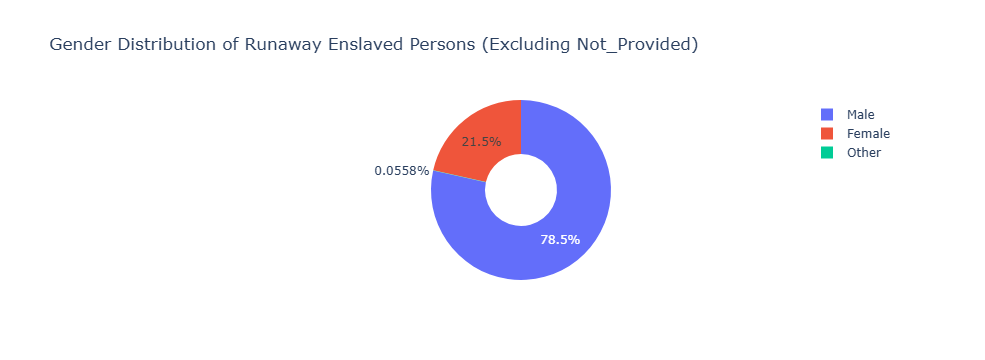

In [49]:
import plotly.express as px
import pandas as pd

# 如果尚未加载数据，请先加载清理好的数据
df_s = pd.read_csv('C:/Users/Surface/Desktop/working-with-data/research-project/data/processed/1-FOTM-Dataset-Full-Flattened.csv')

# 去除性别为 Not_Provided 的记录
df_gender_valid = df_s[df_s['gender'] != 'Not_Provided']

# 用 Plotly Express 创建饼图
fig = px.pie(
    df_gender_valid,
    names='gender',
    title='Gender Distribution of Runaway Enslaved Persons (Excluding Not_Provided)',
    hole=0.4  # 可选：中间空心形成 donut 图效果
)

# 显示图表
fig.show()


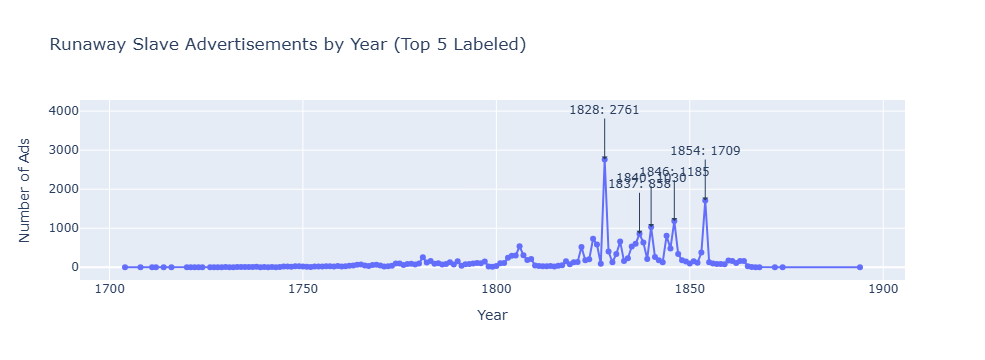

In [51]:

df_year_valid = df_s[df_s['publication_year'].apply(lambda x: str(x).isdigit())].copy()
df_year_valid['publication_year'] = df_year_valid['publication_year'].astype(int)

# 按年份统计数量
year_counts = df_year_valid['publication_year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Number of Runaway Ads']

# Top 5 年份
top_years = year_counts.sort_values('Number of Runaway Ads', ascending=False).head(5)

# 折线图
fig = px.line(
    year_counts,
    x='Year',
    y='Number of Runaway Ads',
    title='Runaway Slave Advertisements by Year (Top 5 Labeled)',
    markers=True
)

# 添加 Top 5 注释（数量 + 年份）
for _, row in top_years.iterrows():
    fig.add_annotation(
        x=row['Year'],
        y=row['Number of Runaway Ads'],
        text=f"{row['Year']}: {row['Number of Runaway Ads']}",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-50
    )

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Ads')
fig.show()


